<a href="https://colab.research.google.com/github/Rahul-Tanawade/Projects/blob/main/telecom_churn_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **churn rate** also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period.

TASK : insight is needed to understand which customer is likely to stop using its telecom service from service provider.


We will use a telecommunications data for predicting customer churn. This is a historical customer data where each row represents one customer. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.




This data set provides info to help you predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

**import libraries needed**

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

!pip install scikit-plot
import scikitplot as skplt



**load file saved in local desktop**

In [ ]:
from google.colab import files
import numpy as np
import io
uploaded=files.upload()


Saving telco_churn.xlsx to telco_churn (1).xlsx


**make dataframe of uploaded file**

In [ ]:
dataset = pd.read_excel(io.BytesIO(uploaded['telco_churn.xlsx']))

In [ ]:
dataset

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11,33,7,136,5,5,0,1,1,4.40,20.75,0.00,15.25,35.7,42.00,211.45,125.0,1,1,0,1,1,0,1.482,3.033,4.913,4,1
1,33,33,12,33,2,0,0,0,0,9.45,0.00,0.00,0.00,0.0,288.80,0.00,0.0,0,0,0,0,0,0,2.246,3.240,3.497,1,1
2,23,30,9,30,1,2,0,0,0,6.30,0.00,0.00,0.00,0.0,157.05,0.00,0.0,0,0,0,0,1,0,1.841,3.240,3.401,3,0
3,38,35,5,76,2,10,1,1,1,6.05,45.00,50.10,23.25,64.9,239.55,1873.05,880.0,1,1,1,1,1,1,1.800,3.807,4.331,4,0
4,7,35,14,80,2,15,0,1,0,7.10,22.00,0.00,23.75,0.0,47.45,166.10,145.0,1,0,0,1,1,0,1.960,3.091,4.382,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55,44,24,83,1,23,0,1,0,17.35,24.50,0.00,14.25,0.0,973.10,1343.50,720.0,0,0,0,0,1,0,2.854,3.199,4.419,3,0
196,34,23,3,24,1,7,0,1,0,6.00,28.00,0.00,12.75,0.0,203.25,959.40,435.0,0,0,0,1,1,0,1.792,3.332,3.178,3,0
197,6,32,10,47,1,10,0,1,0,3.85,23.75,0.00,12.50,0.0,29.90,128.45,80.0,0,0,0,1,1,0,1.348,3.168,3.850,3,0
198,24,30,0,25,4,5,0,1,1,8.70,47.75,0.00,32.75,64.0,186.60,1152.90,780.0,1,1,1,1,1,1,2.163,3.866,3.219,4,1


**Data preprocessing and selection:**

1. select feature list

2. make sure tarhet variable is integer or non string

In [ ]:
churn_df = dataset[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip','callcard', 'wireless','churn']]

In [ ]:
print(churn_df.dtypes)

tenure      int64
age         int64
address     int64
income      int64
ed          int64
employ      int64
equip       int64
callcard    int64
wireless    int64
churn       int64
dtype: object


In [ ]:
churn_df.head(7)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11,33,7,136,5,5,0,1,1,1
1,33,33,12,33,2,0,0,0,0,1
2,23,30,9,30,1,2,0,0,0,0
3,38,35,5,76,2,10,1,1,1,0
4,7,35,14,80,2,15,0,1,0,0
5,68,52,17,120,1,24,0,1,0,0
6,42,40,7,37,2,8,1,1,1,0


**define X( features) and y (target)**

both must be numpy array

In [ ]:
X=np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11,  33,   7, 136,   5,   5,   0],
       [ 33,  33,  12,  33,   2,   0,   0],
       [ 23,  30,   9,  30,   1,   2,   0],
       [ 38,  35,   5,  76,   2,  10,   1],
       [  7,  35,  14,  80,   2,  15,   0]])

In [ ]:
y=np.asarray(churn_df['churn'])
y[0:5]
#y is either 0 or 1, its binary classifier

array([1, 1, 0, 0, 0])

**normalising the feature set**

In [ ]:
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

**splitting into train test set**

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=1234)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


***Logistic Regression with Sklearn***

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.01, solver='liblinear')
lr.fit(X_train,y_train)
print(lr)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
print("coefficients are \n : {}".format(lr.coef_))

print("\nIntercepts are \n : {}".format(lr.intercept_))

coefficients are 
 : [[-0.15154059 -0.08537536 -0.06020004 -0.03197754  0.0785767  -0.13376906
   0.11992008]]

Intercepts are 
 : [-0.23697043]


**predicting on x_test**

In [ ]:
pred=lr.predict(X_test)
print(pred)

accuracy= lr.score(X_test,y_test)
print("\naccuracy found is ",accuracy)



[0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1
 0 0 1]

accuracy found is  0.8


exploring the probabilities

In [ ]:
print(lr.classes_)

#Probability estimates.
#The returned estimates for all classes are ordered by the label of classes.

print(lr.predict_proba(X_test))

# 1st observation is [0.5410555  0.4589445 ], which indicates 54% prediction of class 0 and 45% prediction of class 1


[0 1]
[[0.5410555  0.4589445 ]
 [0.4101133  0.5898867 ]
 [0.74706158 0.25293842]
 [0.76590693 0.23409307]
 [0.49627609 0.50372391]
 [0.42365923 0.57634077]
 [0.73108738 0.26891262]
 [0.46795689 0.53204311]
 [0.41203834 0.58796166]
 [0.5740875  0.4259125 ]
 [0.68044267 0.31955733]
 [0.37330526 0.62669474]
 [0.52609837 0.47390163]
 [0.46946386 0.53053614]
 [0.44577963 0.55422037]
 [0.59487987 0.40512013]
 [0.63745963 0.36254037]
 [0.45674651 0.54325349]
 [0.53681167 0.46318833]
 [0.58648699 0.41351301]
 [0.5139811  0.4860189 ]
 [0.45410206 0.54589794]
 [0.66640343 0.33359657]
 [0.54598465 0.45401535]
 [0.56522011 0.43477989]
 [0.54433122 0.45566878]
 [0.65627012 0.34372988]
 [0.443358   0.556642  ]
 [0.73218103 0.26781897]
 [0.42177355 0.57822645]
 [0.52885611 0.47114389]
 [0.70587987 0.29412013]
 [0.56308746 0.43691254]
 [0.57809205 0.42190795]
 [0.41697713 0.58302287]
 [0.58510939 0.41489061]
 [0.45616547 0.54383453]
 [0.68868321 0.31131679]
 [0.501858   0.498142  ]
 [0.43109823 0.5689

**making confusion matrix**

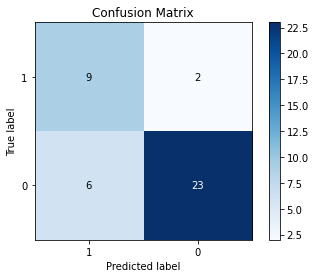

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, pred ,labels=[1,0])

**evaluation metric: log_loss -->**
to maintain a common convention that lower loss scores are better.

In short, there are three steps to find Log Loss:

To find corrected probabilities.

Take a log of corrected probabilities.

Take the negative average of the values we get in the 2nd step.




In [ ]:
from sklearn.metrics import log_loss
pred_prob = lr.predict_proba(X_test)
log_loss(y_test, pred_prob)

0.5723178226347725

**optimising or reducing cost using Gradient descent**


We should find the best parameters for our model by minimizing the cost function of our model.

 gradient descent is an iterative approach to finding the minimum of a function. Specifically, in our case, gradient descent is a technique to use derivative of a cost function to change the parameter values, to minimize the cost/error.

Sigmoid function’s output is always between 0 and 1, which make it proper to interpret the results as probabilities. It is obvious that, when the outcome of sigma function get closer to 1, the probability of y=1, given x, goes up, and in contrast, when the sigmoid value is closer to zero, the probability of y=1, given x, is very small. Here we define a function to compute the sigmoid of an input

In [ ]:
def sigmoid(z):  #function to calculate sigmoid
  s=1.0/ (1.0 + np.exp(-z))
  return s


def cost_computaion(theta,X,y):  #function to calculate cost
  hx=sigmoid(np.dot(X,theta))#  predicted probability of label 1
  cost = (-y)* np.log(hx) - (1-y)*np.log(1-hx) # log-likelihood vector
  J=cost.mean()
  return J


def gradient_computation(theta,X,y): #function to calculate gradient
  hx=sigmoid(np.dot(X,theta))
  error=hx - y
  grad= np.dot(error,X) / y.size
  return grad




In [ ]:
cost_list=list()
def gradient_descent(X,y,theta,alpha,iterations): #function to apply gradient descent
   theta_n=theta.size
   for i in range(iterations):
     grad_val=gradient_computation(theta,X,y) #calculate gradient
     theta=theta- alpha*grad_val #optimisation
     cost=cost_computaion(theta,X,y)
     cost_list.append(cost)
     print("iteration= {}, lrate={}, cost={} ".format(i, alpha,cost))
   return theta  


In [ ]:
coeff=np.reshape(lr.coef_, (7,))
theta=np.insert(coeff,0,lr.intercept_) #add intercept at 1st position , 0 index

#y_pred_1= (intercept) + x1*coeff1 + x2*coeff2 - - - - - - - - + x3*coeff3

X_train_1 = np.append( np.ones((X_train.shape[0], 1)), X_train, axis=1) #this will add element '1' at postion 0 at every observation, which will get multiplied with intercept in sigmoid function
X_test_1 = np.append( np.ones((X_test.shape[0], 1)), X_test, axis=1)

new_theta = gradient_descent(X_train_1,y_train,theta,0.1,500)

iteration= 0, lrate=0.1, cost=0.5807531979206212 
iteration= 1, lrate=0.1, cost=0.5761468178755242 
iteration= 2, lrate=0.1, cost=0.5718603307838206 
iteration= 3, lrate=0.1, cost=0.5678607368828773 
iteration= 4, lrate=0.1, cost=0.5641193746245635 
iteration= 5, lrate=0.1, cost=0.5606112701599164 
iteration= 6, lrate=0.1, cost=0.5573145908467856 
iteration= 7, lrate=0.1, cost=0.5542101860707376 
iteration= 8, lrate=0.1, cost=0.5512812010967214 
iteration= 9, lrate=0.1, cost=0.5485127518885191 
iteration= 10, lrate=0.1, cost=0.545891650787722 
iteration= 11, lrate=0.1, cost=0.5434061746250285 
iteration= 12, lrate=0.1, cost=0.5410458682600009 
iteration= 13, lrate=0.1, cost=0.5388013777381305 
iteration= 14, lrate=0.1, cost=0.5366643082466636 
iteration= 15, lrate=0.1, cost=0.534627102873074 
iteration= 16, lrate=0.1, cost=0.5326829388496721 
iteration= 17, lrate=0.1, cost=0.5308256385286226 
iteration= 18, lrate=0.1, cost=0.5290495927941766 
iteration= 19, lrate=0.1, cost=0.5273496950

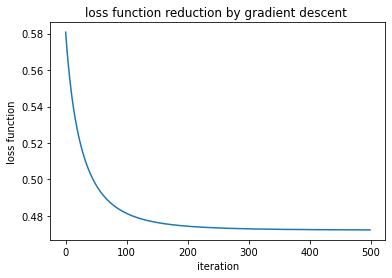

In [ ]:
plt.plot(cost_list)
plt.xlabel("iteration")
plt.ylabel("loss function")
plt.title("loss function reduction by gradient descent ")
plt.show()

In [ ]:
print("previous coefficients \n : {}".format(lr.coef_))
print("after GD, new  coefficients \n : {}".format(new_theta[1:]))

previous coefficients 
 : [[-0.15154059 -0.08537536 -0.06020004 -0.03197754  0.0785767  -0.13376906
   0.11992008]]
after GD, new  coefficients 
 : [-0.76396547 -0.26751366  0.15868865 -0.07477921  0.21933543 -0.55608646
  0.56443443]


**predicting with new optimised parameters**

In [ ]:
def predict_class(X,theta):
  m,n=X.shape
  p = np.zeros(shape=(m, 1))

  h=sigmoid(np.dot(X,theta))
  for it in range(0, X.shape[0]):
    if h[it] > 0.5:    # if threshold is above 0.5, its class 1 else class 0
      p[it,0]=1
    else:
      p[it, 0] = 0 
  return p     

In [ ]:
print(new_theta)

[-1.2162785  -0.76396547 -0.26751366  0.15868865 -0.07477921  0.21933543
 -0.55608646  0.56443443]


In [ ]:
#theta_nw=np.reshape(new_theta, (8,))
pred=predict_class(X_test_1,theta_nw)

In [ ]:
#adjusting shape to calculate accuracy
print(y_test.shape)
print(pred.shape)
pred=np.reshape(pred,((40,)))
print(pred.shape)

accuracy= (pred==y_test).sum()/float(pred.size)
print("accuracy calculated on test set is {}".format(accuracy * 100))

(40,)
(40, 1)
(40,)
accuracy calculated on test set is 77.5


In [ ]:
#to predict class 0 or 1 of any new observation:X_new
#predict_class(X_new,theta_nw)